In [1]:
import os
import matplotlib
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from wavespectra import read_swan

%matplotlib inline


# Polar plotting of wave spectra using xarray api

In [2]:
WAVESPECTRA_PATH = "/source/wavespectra"

dset = read_swan(
    os.path.join(WAVESPECTRA_PATH, "tests/sample_files/swanfile.spec"),
    as_site=True
)
darray = dset.isel(site=0).efth.sortby("dir")


## Simplest usage
The `SpecArray` accessor provides an api similar to `DataArray` for plotting polar 2D spectrum with some predefined defaults.

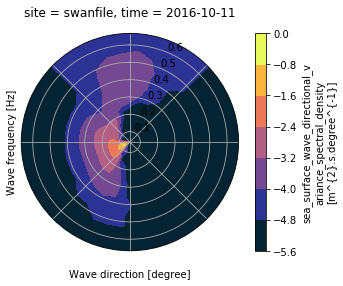

In [3]:
darray.isel(time=0).spec.plot.contourf()

## Spectra can be plotted in the period space

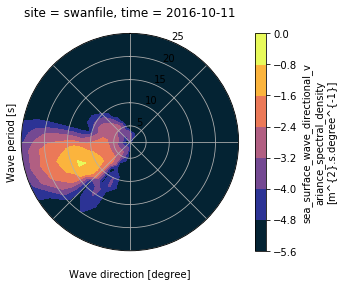

In [4]:
darray.isel(time=0).spec.plot.contourf(as_period=True)

## By default the log10(efth) is plotted but the real values could be plotted instead:

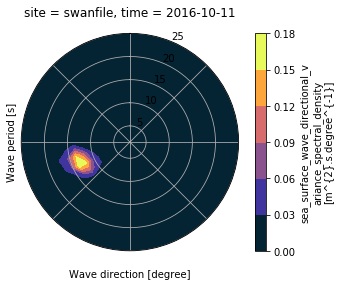

In [5]:
darray.isel(time=0).spec.plot.contourf(as_period=True, as_log10=False)

## Radius extent can be controlled either by slicing frequencies or by setting axis property:


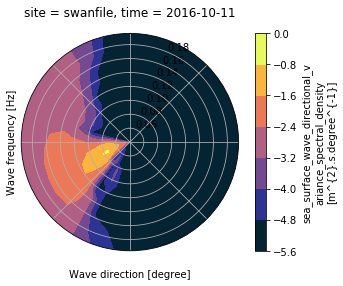

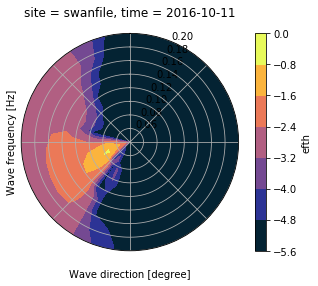

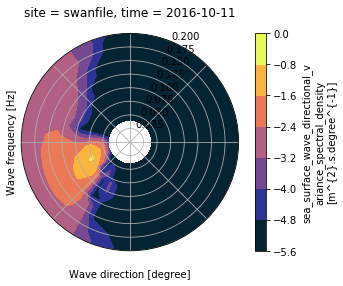

In [11]:
# Using DataArray.sel, frequencies will be contained within the slicing limits
darray.isel(time=0).sel(freq=slice(0.0, 0.2)).spec.plot.contourf()

# Using SpecArray.split, frequencies are interpolated at the slicing limits except for fmin which is < min(freq)
plt.figure()
darray.isel(time=0).spec.split(fmin=0, fmax=0.2).spec.plot.contourf()

# Using axis properties
plt.figure()
darray.isel(time=0).spec.plot.contourf()
ax = plt.gca()
ax.set_rmin(0)
ax.set_rmax(0.2)


## Using xarray / matplotlib properties

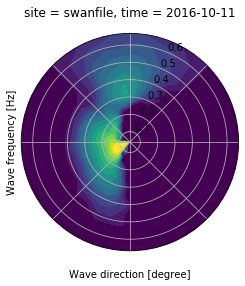

In [20]:
darray.isel(time=0).spec.plot.contourf(
    cmap="viridis",
    vmin=-5,
    vmax=-2,
    levels=15,
    add_colorbar=False,
)

## Multiple spectra

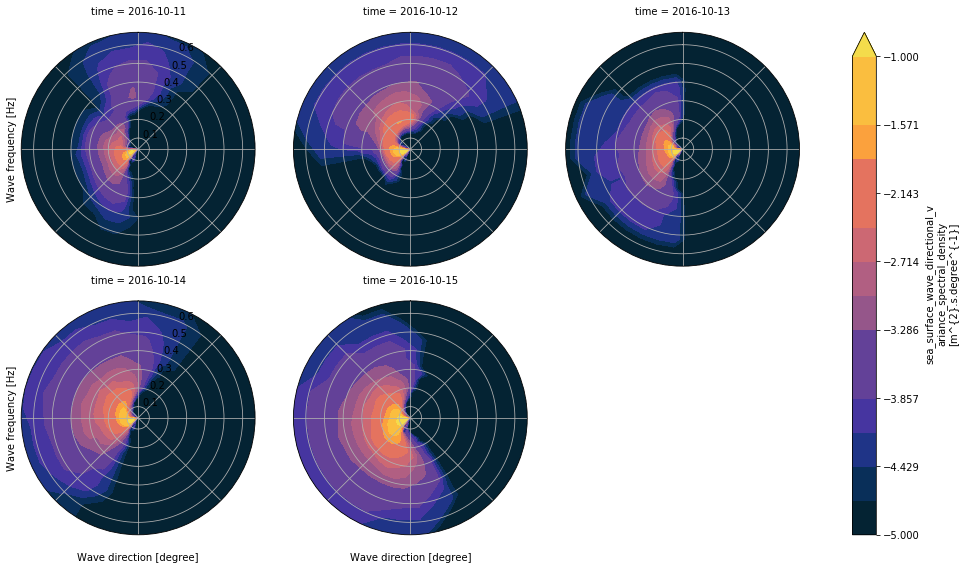

In [24]:
darray.spec.plot.contourf(col="time", col_wrap=3, levels=15, figsize=(15,8), vmax=-1)

## Clean axis, useful if plotting up many small axes for overview

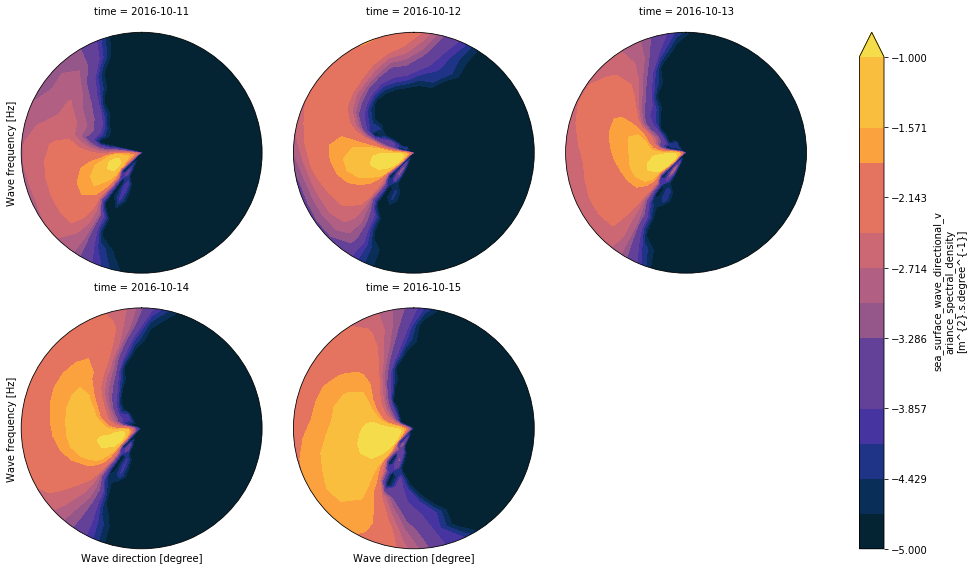

In [27]:
darray.sel(freq=slice(0, 0.2)).spec.plot.contourf(
    col="time",
    col_wrap=3,
    levels=15,
    figsize=(15,8),
    vmax=-1,
    clean_radius=True,
    clean_sector=True
)